In [ ]:
import scanpy as sc
import scvi 
import anndata
import matplotlib.pyplot as plt
import numpy as np 
import torch
import pandas as pd
import seaborn as sb
import scanpy.external as sce
from tqdm import tqdm

torch.cuda.is_available() 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#scvi.settings.seed = <>

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
scvi.__version__

In [ ]:
scvi.__version__ #(Conda env:root)

### MERGE

In [1]:
import scanpy as sc
import scvi 
import anndata
import matplotlib.pyplot as plt
import numpy as np 
import torch
import pandas as pd
import seaborn as sb
import scanpy.external as sce
from tqdm import tqdm

torch.cuda.is_available() 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#scvi.settings.seed = <>

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
scvi.__version__

Global seed set to 0


'0.14.5'

In [2]:
adata_ref = anndata.read_h5ad('adata_ref_panfetal_CD8Lineage_b4_preprocessing.h5ad')
adata_ref.X = adata_ref.layers['counts']
adata_ref.obs['ATO_days'] = np.repeat(10000,adata_ref.shape[0])
adata_ref.obs['ID'] = np.repeat('Reference', adata_ref.shape[0])

adata_ato = anndata.read_h5ad('adata_ATO_SPT.h5ad')
adata_ato.obs['ID'] = np.repeat('Organoid',adata_ato.shape[0])

In [3]:
print(adata_ref.X.data)
print(adata_ato.X.data)
print(adata_ref.shape) 
print(adata_ato.shape) 
print(np.unique(adata_ato.obs.new_annotation)) 
print(np.unique(adata_ref.obs.ANNOTATION)) 

[ 1.  2.  3. ...  2.  2. 13.]
[ 1.  1.  2. ... 16.  1. 84.]
(83177, 33538)
(19013, 33538)
['ABT(ENTRY)' 'DN(EARLY)_T' 'DN_T' 'DP(P)_T' 'DP(Q)_T' 'ENDOTHELIUM'
 'HSC_MPP' 'HSC_MPP/LMPP_MLP/DC2' 'IPSC' 'MESODERMAL_PROGENITOR'
 'PRIMITIVE_STREAK' 'SP_T']
['ABT(ENTRY)' 'CD8+T' 'CYCLING_MPP' 'DN(P)_T' 'DN(Q)_T' 'DN(early)_T'
 'DP(P)_T' 'DP(Q)_T' 'HSC_MPP' 'LMPP_MLP']


In [4]:
adata = adata_ref.concatenate(adata_ato, batch_key='ref',index_unique=None) 
del adata.obs['ref']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

/opt/conda/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


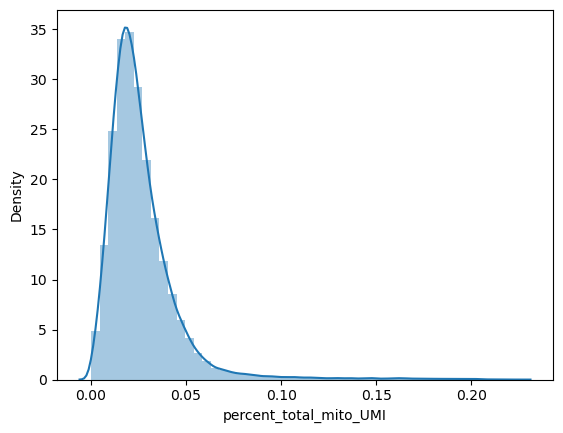

In [6]:
adata.raw = adata.copy() 

# remove cell cycle genes
cc_genes = pd.read_csv('regev_lab_cell_cycle_genes.txt', header=None ) # https://notebook.community/theislab/scanpy_usage/180209_cell_cycle/cell_cycle -- 97 CC GENES
#cc_genes = ['C1orf112', 'KDM1A', 'ARHGAP33', 'CDC27', 'AC004381.6', 'DBF4', 'PRSS21', 'E2F2', 'BAZ1B', 'NCAPD2', 'ANLN', 'BRCA1', 'UBR7', 'DDX11', 'TACC3', 'POLA2', 'DEPDC1', 'NCAPH2', 'HMGB3', 'CENPQ', 'DEPDC1B', 'SPDL1', 'TDP1', 'DSG2', 'NOP16', 'RFC2', 'RAD51', 'POLQ', 'THOC3', 'MRTO4', 'C4orf27', 'POLD1', 'TM7SF3', 'MCM10', 'MTHFD2', 'YBX1', 'ASPM', 'PRR11', 'NUCKS1', 'EXOC5', 'TCOF1', 'RAD18', 'TRIP13', 'DAZAP1', 'HLTF', 'PDCD2', 'SMC1A', 'HMMR', 'MCM2', 'NUP37', 'GTSE1', 'WDR62', 'MCM6', 'MLH1', 'UNG', 'SPAG5', 'UBE2T', 'EXOSC5', 'FAM76B', 'POLD3', 'KIF22', 'PUM3', 'RBL1', 'NDC80', 'HSPB11', 'OXCT1', 'SEH1L', 'ORC1', 'RAD54L', 'NOP14', 'GMCL1', 'AURKA', 'TPX2', 'BIRC5', 'KIF4A', 'FH', 'ORC6', 'G2E3', 'WDR76', 'PHGDH', 'CLSPN', 'NUP50', 'CDC45', 'CDC6', 'CBX5', 'MSH2', 'FKBP5', 'ACOT7', 'CDC7', 'RANBP1', 'CENPM', 'HMGXB4', 'MCM5', 'RANGAP1', 'POLE2', 'CDKN3', 'ERH', 'MTHFD1', 'VRK1', 'EMC9', 'GINS1', 'MYBL2', 'CDC25B', 'PLCB4', 'FAM83D', 'CEP76', 'RBBP8', 'POLA1', 'NUP93', 'CTCF', 'CCP110', 'CEP152', 'OIP5', 'MYEF2', 'MCM4', 'KCTD9', 'RNASEH2A', 'SGTA', 'ASF1B', 'LIG1', 'H2AFV', 'GARS', 'NUDT1', 'RPA3', 'EZH2', 'RHEB', 'SMC3', 'UBE2S', 'RAD51C', 'GALK1', 'C1QBP', 'BLMH', 'TMEM97', 'GAR1', 'NEIL3', 'WHSC1', 'NCAPG', 'CCDC34', 'CCDC86', 'MAGOHB', 'FOXM1', 'GPN3', 'RAD51AP1', 'RFC5', 'NUP107', 'TIMELESS', 'GAPDH', 'CDCA3', 'ENO2', 'FBXO5', 'MCM3', 'BAG2', 'GMNN', 'TTK', 'HMGCS1', 'BRD8', 'KIF20A', 'LMNB1', 'NUP155', 'H2AFY', 'SMC4', 'ECT2', 'CENPA', 'FHL2', 'MSH6', 'DHCR24', 'LRRC42', 'WDR77', 'SRM', 'MAD2L2', 'UCHL5', 'TTF2', 'SLC2A1', 'EBNA1BP2', 'CDC20', 'STMN1', 'NEK2', 'CENPF', 'KIF14', 'CASP8AP2', 'CTNNAL1', 'WDR34', 'PHF19', 'ACYP1', 'EPCAM', 'HELLS', 'CENPL', 'ACAT2', 'MASTL', 'EXOSC8', 'TMPO', 'NFYB', 'NCAPH', 'MND1', 'KIF18A', 'GPSM2', 'GTF3A', 'MRPS2', 'CCDC18', 'CISD1', 'ZWINT', 'CIT', 'DDX39A', 'CENPK', 'CDK2', 'TUBA1B', 'STIL', 'HJURP', 'EXOSC9', 'CKS2', 'ACSL3', 'CSE1L', 'HIST1H1D', 'HIST1H1A', 'DEK', 'GOT2', 'MGME1', 'MCM8', 'HNRNPR', 'BCL2L12', 'TRAP1', 'DLGAP5', 'YEATS4', 'PKMYT1', 'SRD5A3', 'PAICS', 'HAT1', 'KNSTRN', 'DUT', 'E2F8', 'FAM64A', 'MIS18BP1', 'SGOL1', 'RPS4Y1', 'LDLR', 'TOMM40', 'ATP8B3', 'LSM4', 'DNMT1', 'GINS2', 'TUBG1', 'PSMC3IP', 'THOC6', 'TOP2A', 'ENOSF1', 'RAN', 'RPA1', 'PCNA', 'NASP', 'RFC3', 'SLF1', 'LRRCC1', 'CCNB1', 'PSRC1', 'TMEM106C', 'LDHA', 'DDB2', 'CDCA8', 'TPGS2', 'SLC43A3', 'C9orf40', 'TROAP', 'ESPL1', 'NTPCR', 'CKAP2', 'BORA', 'NUDT15', 'BRIP1', 'ACTL6A', 'TXN', 'ODF2', 'SMC2', 'CDK5RAP2', 'ANP32B', 'DSCC1', 'ARHGEF39', 'PPIL1', 'TCF19', 'NRM', 'GGH', 'BUD13', 'CTDSPL2', 'NUSAP1', 'KIF23', 'CASC5', 'CENPO', 'KIF11', 'CEP55', 'KIF20B', 'DNA2', 'BARD1', 'MNS1', 'ZGRF1', 'CENPE', 'HADH', 'SLC39A8', 'NEDD1', 'BRCA2', 'DIAPH3', 'PIF1', 'FANCI', 'TICRR', 'SAMD1', 'SAE1', 'PLK4', 'ITGB3BP', 'KIF2C', 'UCK2', 'NUF2', 'ANP32E', 'DTL', 'ILF2', 'C1orf35', 'HNRNPLL', 'CHAC2', 'POLR2D', 'CDCA7', 'FANCD2', 'CCNA2', 'SKP2', 'PRIM2', 'MMS22L', 'PM20D2', 'MTFR2', 'CDCA5', 'NCAPG2', 'PRPS1', 'GINS4', 'HAUS6', 'CEP78', 'GTF3C5', 'MKI67', 'IMMP1L', 'SSRP1', 'INCENP', 'CCDC15', 'CHEK1', 'DSN1', 'HIRIP3', 'HMGA2', 'TEX30', 'NCAPD3', 'CENPU', 'CENPJ', 'SPC25', 'SUV39H2', 'CENPH', 'CARHSP1', 'CLGN', 'CCSAP', 'BUB3', 'SLFN13', 'SKA1', 'SLC16A1', 'TMEM237', 'ADK', 'FAM122B', 'AIFM1', 'ATAD2', 'SASS6', 'BUB1B', 'CCNB2', 'PSMG3', 'FAIM', 'CDC25C', 'MIS18A', 'ATP5G1', 'IGF2BP1', 'CHAF1B', 'NAE1', 'CCDC58', 'C21orf58', 'ZNF714', 'GPATCH4', 'YDJC', 'RACGAP1', 'SPC24', 'POLR3K', 'CCNF', 'ASRGL1', 'USP1', 'KIAA1524', 'SGOL2', 'TOPBP1', 'KIF15', 'WDR43', 'RFC4', 'RPL39L', 'RNF168', 'H2AFZ', 'CDC25A', 'POC1A', 'HMGB2', 'MAD2L1', 'PTTG1', 'RAD21', 'PSIP1', 'GKAP1', 'MELK', 'SLC7A3', 'SKA3', 'LRR1', 'HPRT1', 'E2F7', 'JAM3', 'BRD7', 'CENPN', 'LEO1', 'WEE1', 'MCM7', 'CENPV', 'SAAL1', 'FAM111A', 'KIAA0101', 'PLK1', 'XRCC6BP1', 'SNRPD1', 'RRM1', 'CDT1', 'CHAF1A', 'C19orf48', 'NUDT8', 'PRDX2', 'TK1', 'SAC3D1', 'PBK', 'HIST1H1E', 'DTYMK', 'RFWD3', 'FEN1', 'ING2', 'CDKN2AIP', 'SNRNP48', 'USP39', 'CKAP2L', 'BUB1', 'ELP5', 'CDK1', 'CDCA4', 'SHCBP1', 'PGAM1', 'ESCO2', 'RHNO1', 'CTPS1', 'RRM2', 'THOP1', 'C5orf34', 'POP7', 'ZNF738', 'CKS1B', 'GMPPB', 'CNP', 'CBX2', 'C16orf91', 'EXO1', 'ZWILCH', 'ANKRD36C', 'UBE2C', 'CKAP5', 'CCNE2', 'CCDC14', 'RMI2', 'TOMM5', 'RUVBL1', 'ATAD5', 'LMNB2', 'TYMS', 'PXMP2', 'SHMT1', 'POLE', 'PAWR', 'PIDD1', 'GSG2', 'GEN1', 'RMI1', 'AURKB', 'RCC1', 'PPA1', 'HIST3H2A', 'MRPS23', 'RTKN2', 'IDH2', 'KPNA2', 'CEP97', 'GLRX5', 'SKA2', 'CEP57L1', 'PSMG1', 'SFXN4', 'ALYREF', 'TRAIP', 'LIN9', 'KMT5A', 'PGP', 'CMSS1', 'HIST2H2AC', 'HIST1H1B', 'KNTC1', 'CDCA2', 'H1FX', 'SIVA1', 'PARPBP', 'KIF18B', 'ERCC6L', 'PTMA', 'HSPA14', 'FANCA', 'ARHGAP11B', 'TUBB4B', 'CENPP', 'H2AFX', 'FAM72B', 'FAM221A', 'FAM111B', 'HN1', 'HMGB1', 'TUBB', 'IARS', 'ERI2', 'HIST1H4C', 'BLM', 'PRIM1', 'HMGN5', 'SVIP', 'TFDP1', 'TXNRD1', 'WDHD1', 'EIF1AY', 'ARHGAP11A', 'HMGN2', 'DCAF12', 'PRC1', 'CCDC167', 'CENPW', 'GPANK1', 'MZT1', 'C4orf46', 'KLHL23', 'MXD3', 'DNAJC9', 'IFRD2', 'CKLF', 'FANCG', 'DHFR', 'DLEU2', 'AP000251.3', 'KIFC1', 'CRNDE', 'C8orf88', 'PRKDC', 'BOP1', 'RP11-196G18.23', 'CTC-260E6.6', 'NCBP2-AS2', 'HIST1H3G', 'HIST1H2AH', 'UHRF1', 'RDM1', 'HIST1H2AM']
cc_genes = np.asarray(cc_genes[0]) 
#len(cc_genes)
relevent_cc_genes = [] 
for cc_gene in cc_genes:
    if(cc_gene in adata.var_names):
        relevent_cc_genes.append(cc_gene)
adata = adata[:,np.setdiff1d(adata.var_names,relevent_cc_genes)] 

#print(np.unique(adata.var_names.str.startswith('MT-'), return_counts=True)  )

mito_genes = adata.var_names.str.startswith('MT-') # 13 mito genes presents
total_UMI_count_across_mito_genes = np.sum(adata.X[:, mito_genes],axis=1).A1
total_UMI_count_across_genes = np.sum(adata.X,axis=1).A1 
adata.obs['percent_total_mito_UMI']= np.nan_to_num(np.divide(total_UMI_count_across_mito_genes,total_UMI_count_across_genes))
sb.distplot(adata.obs['percent_total_mito_UMI']) 

Q1,Q3 = np.percentile(adata.obs['percent_total_mito_UMI'],[25,75])
IQR = Q3-Q1
U = Q3 + (1.5*IQR)
#print(U*100)
adata = adata[adata.obs['percent_total_mito_UMI']<0.08] 
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_per_cell(adata, 10000) 
sc.pp.log1p(adata)

#print(np.unique(adata_ato.obs.new_annotation)) 
#print(np.unique(adata_ref.obs.ANNOTATION)) 

sc.pp.highly_variable_genes(adata)
adata = adata[:, adata.var.highly_variable]
#sc.pp.scale(adata,max_value=10)

In [7]:
print(len(np.unique(adata.obs['bbk'])))  # no of batches = 35
adata

35


View of AnnData object with n_obs × n_vars = 100024 × 2192
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'name', 'uniform_label', 'uniform_label_expanded_merged', 'uniform_label_lvl0', 'organ', 'Sample.lanes', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Processing_method', 'AnnatomicalPart', 'Sample', 'bbk', 'scvi_clusters', 'anno_lvl_2_LYMPHOID', 'anno_lvl_2_MYELOID', 'anno_lvl_2_MEM_PROGENITORS', 'leiden_150', 'ANNOTATION', 'ATO_days', 'ID', 'sanger_sample_id', 'batch', 'time_id', 'new_annotation', 'percent_total_mito_UMI'
    var: 'GeneID-0', 'GeneName-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'mt-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [8]:
def run_scvi(adata):
    scvi.model.SCVI.setup_anndata(adata, batch_key="bbk", layer="counts")
    arches_params = dict(use_layer_norm="both",use_batch_norm="none", encode_covariates=True, dropout_rate=0.2, n_layers=2,)
    vae_ref = scvi.model.SCVI(adata, **arches_params)
    print(vae_ref)
    vae_ref.train()
    adata.obsm["X_scVI"] = vae_ref.get_latent_representation()
    sc.pp.neighbors(adata, use_rep="X_scVI")
    sc.tl.umap(adata)
    #sc.tl.leiden(adata, key_added='SCVI_leiden')
    return adata
adata = adata.copy()
adata = run_scvi(adata) 

/opt/conda/lib/python3.7/site-packages/scvi/data/_utils.py:158: UserWarning: Category 17 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  category, alternate_column_key


SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 2, dropout_rate: 0.2, dispersion: gene, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Not Trained

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Epoch 80/80: 100%|██████████| 80/80 [09:54<00:00,  7.43s/it, loss=762, v_num=1]


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [1]:
#sc.set_figure_params(fontsize=4, dpi=200)
#sc.pl.umap(adata,color = ['ANNOTATION','new_annotation'],palette='tab20',legend_loc='on data')

In [2]:
#sc.set_figure_params(fontsize=4, dpi=200)
#sc.pl.umap(adata,color = ['ANNOTATION','new_annotation'],palette='tab20',legend_loc='on data')

In [10]:
ann = [] 
for i in range(adata.shape[0]):
    if(adata.obs.ID[i]=='Organoid'):
        ann.append( adata.obs['new_annotation'][i])
    else:
        ann.append( adata.obs['ANNOTATION'][i])
adata.obs['ANNOTATION_COMB'] = ann

In [11]:
#sc.set_figure_params(fontsize=4, dpi=200)
#sc.pl.umap(adata,color = ['ANNOTATION','new_annotation'],palette='tab20',legend_loc='on data')

In [3]:
#sc.pl.umap(adata,color = ['ANNOTATION_COMB','ID'],palette='tab20',legend_loc='on data')

In [15]:
adata

AnnData object with n_obs × n_vars = 100024 × 2192
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'name', 'uniform_label', 'uniform_label_expanded_merged', 'uniform_label_lvl0', 'organ', 'Sample.lanes', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Processing_method', 'AnnatomicalPart', 'Sample', 'bbk', 'scvi_clusters', 'anno_lvl_2_LYMPHOID', 'anno_lvl_2_MYELOID', 'anno_lvl_2_MEM_PROGENITORS', 'leiden_150', 'ANNOTATION', 'ATO_days', 'ID', 'sanger_sample_id', 'batch', 'time_id', 'new_annotation', 'percent_total_mito_UMI', '_scvi_batch', '_scvi_labels', 'ANNOTATION_COMB'
    var: 'GeneID-0', 'GeneName-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'mt-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'ANNOTATION_colors', 'new_annotation_colors', 'ANNOTATION_COMB_colors', 'ID_colors'
    obsm: 'X_scVI', 'X_umap'
  

In [14]:
adata.write_h5ad('adata_refato_CD8_lineage_b4_reducerep.h5ad')

In [15]:
import bbknn
from tqdm import tqdm
from scipy import stats as st
from scipy.special import softmax

adata_org= adata[adata.obs.ID=='Organoid']
adata_ref = adata[adata.obs.ID=='Reference']
params = {}
params['computation'] = 'cKDTree'
params['neighbors_within_batch'] = 3

nn_adata_org = adata_org#[[ x not in ['IPSC','ENDOTHELIUM','MESODERMAL_PROGENITOR','PRIMITIVE_STREAK' ] for x in adata_org.obs.ANNOTATION] ] 

ckd = bbknn.matrix.create_tree(nn_adata_org.obsm['X_umap'] , params)
knn_distances, knn_indices = bbknn.matrix.query_tree(adata[adata.obs.ID=='Reference'].obsm['X_umap'], ckd, params)
adata.obs['new_approx_time'] = np.repeat(0.0,adata.shape[0])
temp = []
for i in tqdm(range(len(knn_indices))):
   # if(adata.obs_names[i] not in s.obs_names):
   #     continue
    org_neighbours = nn_adata_org[knn_indices[i]]
    org_nn_ATO_days = np.asarray(org_neighbours.obs['ATO_days'])
    #sqrd = knn_distances[i]
    weights = softmax(knn_distances[i]) #sqrd /np.sum(sqrd) 
    temp = 1/weights # taking reciprocal as higher the distance we need smaller the weight
    weights = temp/np.sum(temp)
    approx_time = np.dot(weights,org_nn_ATO_days) 
    adata[adata_ref.obs_names[i]].obs['new_approx_time'][0] = approx_time

  0%|          | 0/20324 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 20324/20324 [07:18<00:00, 46.38it/s]


In [16]:
for i in range(adata.shape[0]):
    if(adata.obs.ID[i] == 'Organoid'):
        adata.obs['new_approx_time'][i] = adata.obs['ATO_days'][i] 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


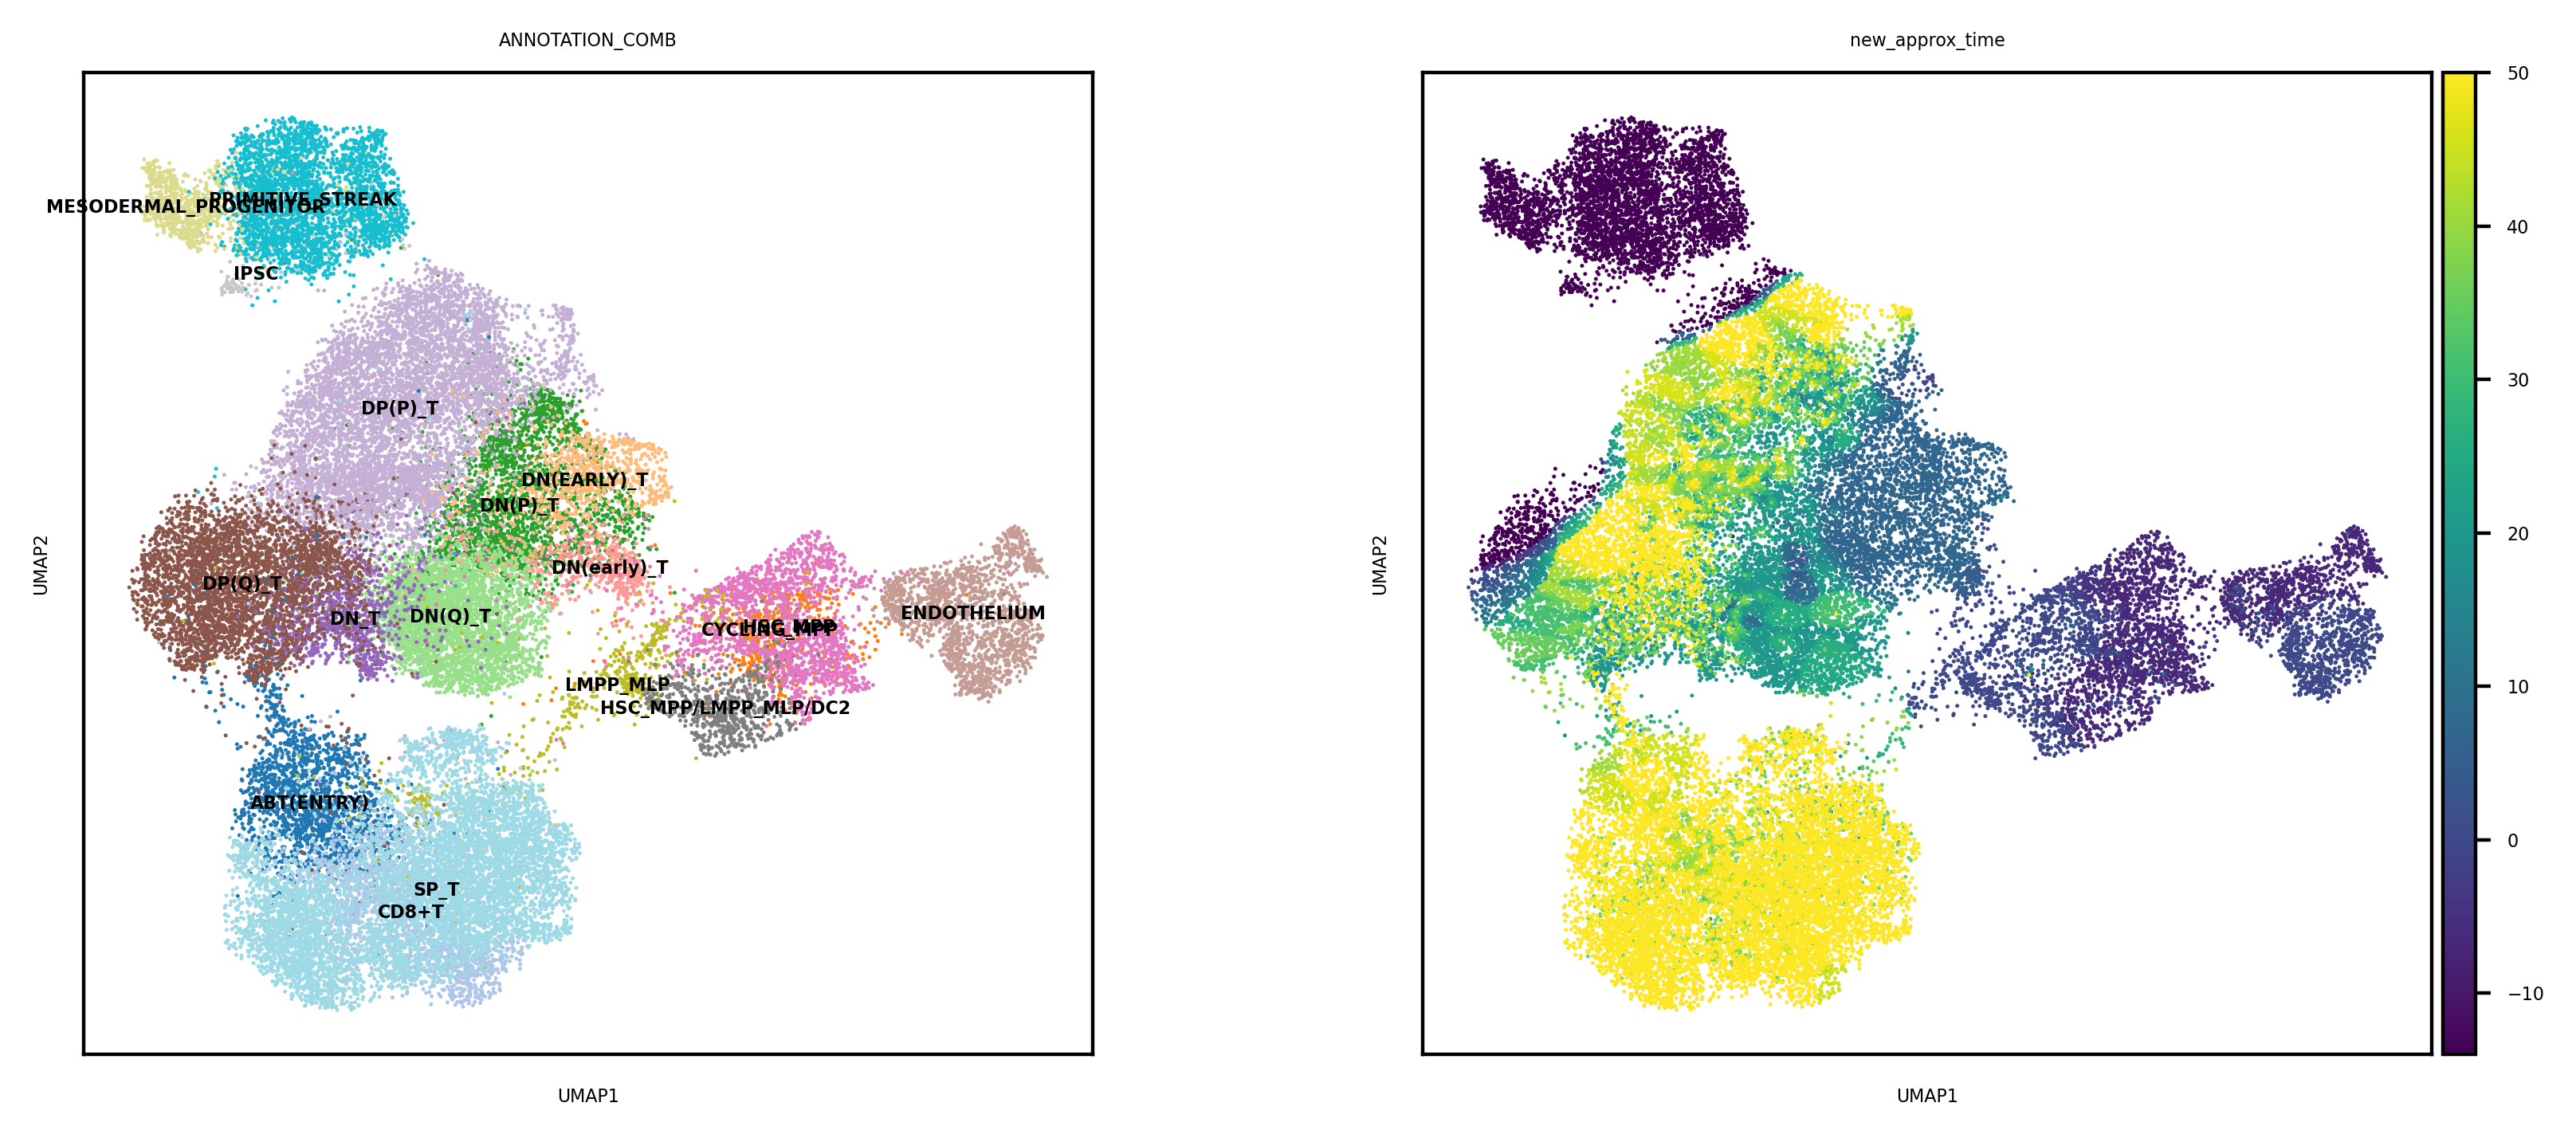

In [17]:
sc.pl.umap(adata,color = ['ANNOTATION_COMB','new_approx_time'],palette='tab20',legend_loc='on data')

In [18]:
ctype_prior_averages = {}
for ctype in np.unique(adata.obs.ANNOTATION_COMB):
    ctype_prior_averages[ctype] = np.mean(adata[adata.obs.ANNOTATION_COMB==ctype].obs.new_approx_time)

In [19]:
ctype_prior_averages

{'ABT(ENTRY)': 45.69900543291408,
 'CD8+T': 47.82775913078659,
 'CYCLING_MPP': -3.47605039289257,
 'DN(EARLY)_T': 7.893350062735257,
 'DN(P)_T': 11.258484984214219,
 'DN(Q)_T': 21.390072008820468,
 'DN(early)_T': 6.556011075763115,
 'DN_T': 27.374853113983548,
 'DP(P)_T': 35.1603752227862,
 'DP(Q)_T': 29.81158649045105,
 'ENDOTHELIUM': -3.5720338983050848,
 'HSC_MPP': -4.648770862743391,
 'HSC_MPP/LMPP_MLP/DC2': -3.5,
 'IPSC': -14.0,
 'LMPP_MLP': 14.274565389780829,
 'MESODERMAL_PROGENITOR': -14.0,
 'PRIMITIVE_STREAK': -13.995365772922874,
 'SP_T': 48.09438853308936}

In [20]:
# We refine approx time to ensure outliers due to noise in scvi embedding does not affect priors
adata.obs['refined_new_approx_time'] = np.repeat(0.0, adata.shape[0])
for i in range(adata.shape[0]):
    if(adata.obs.ID[i]=='Reference'):
        adata.obs['refined_new_approx_time'][i] = ctype_prior_averages[adata.obs.ANNOTATION_COMB[i]]
    else:
        adata.obs['refined_new_approx_time'][i] = adata.obs['new_approx_time'][i]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


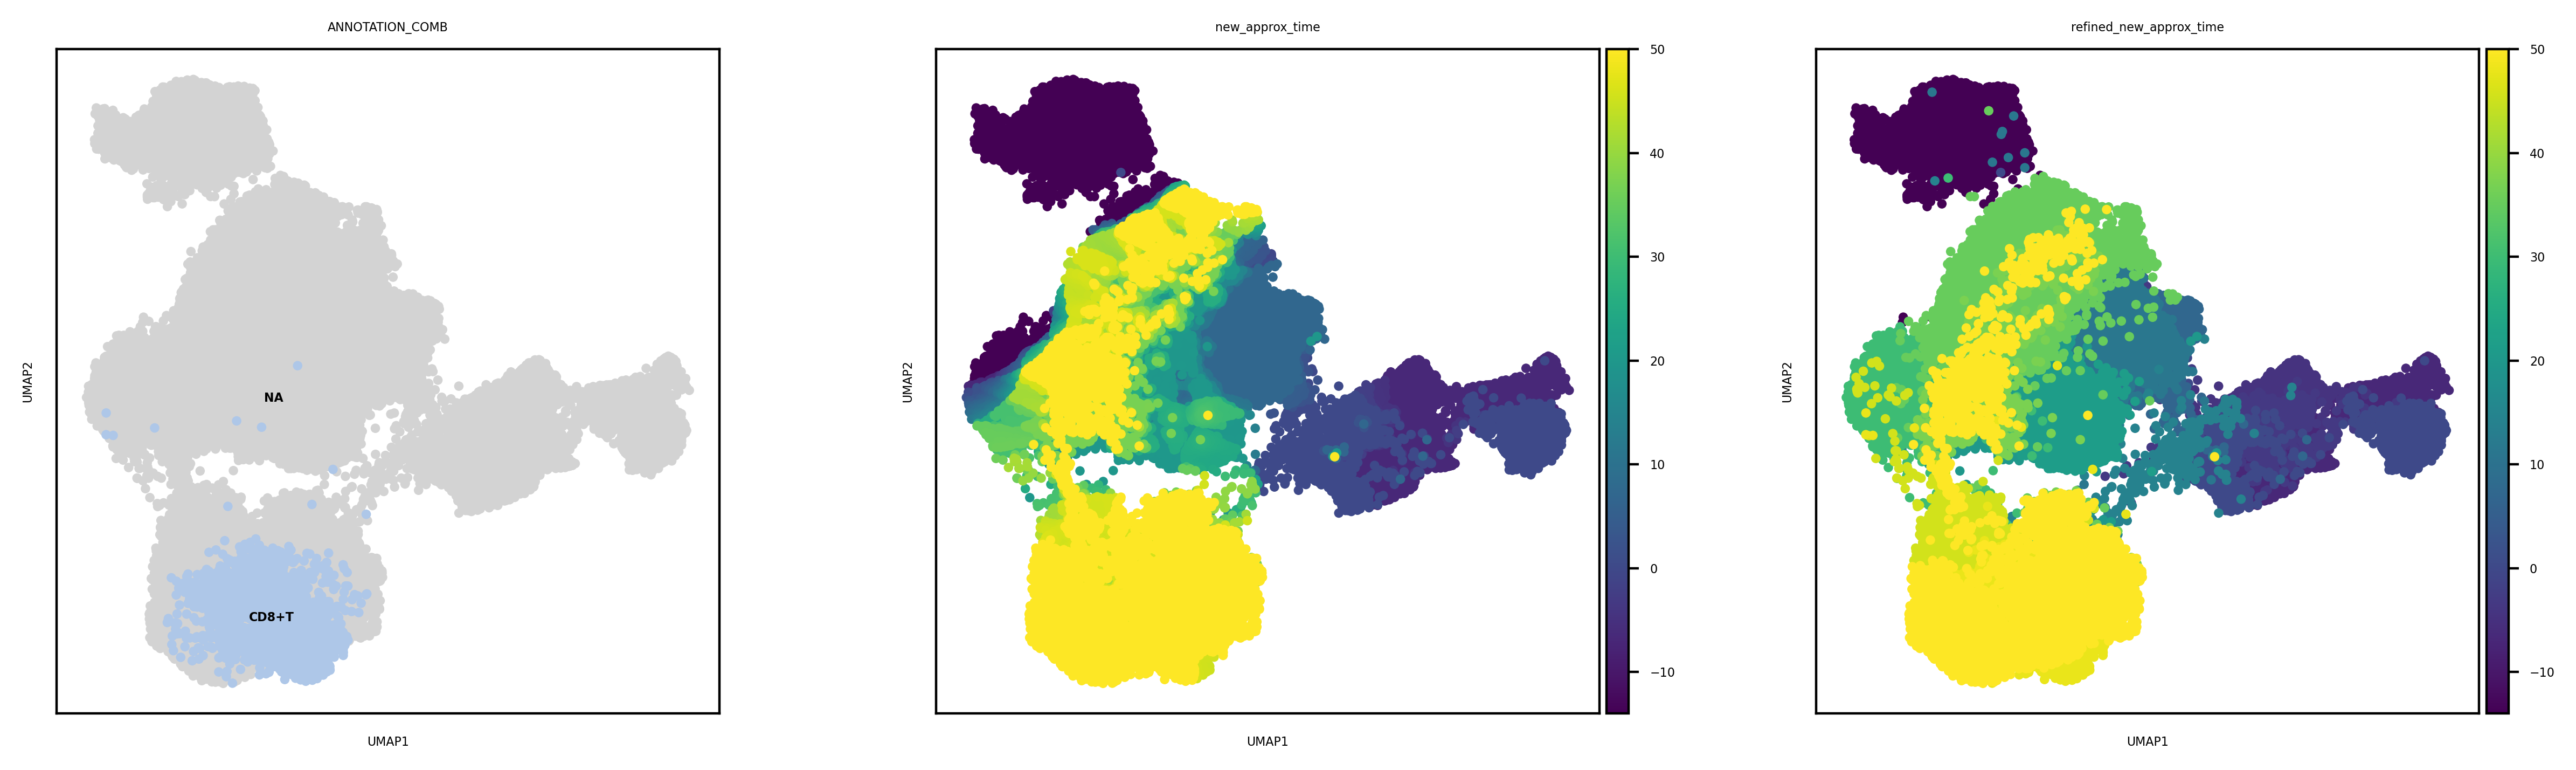

In [21]:
sc.pl.umap(adata,color = ['ANNOTATION_COMB','new_approx_time','refined_new_approx_time'],palette='tab20',legend_loc='on data',s=40, groups='CD8+T')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy o

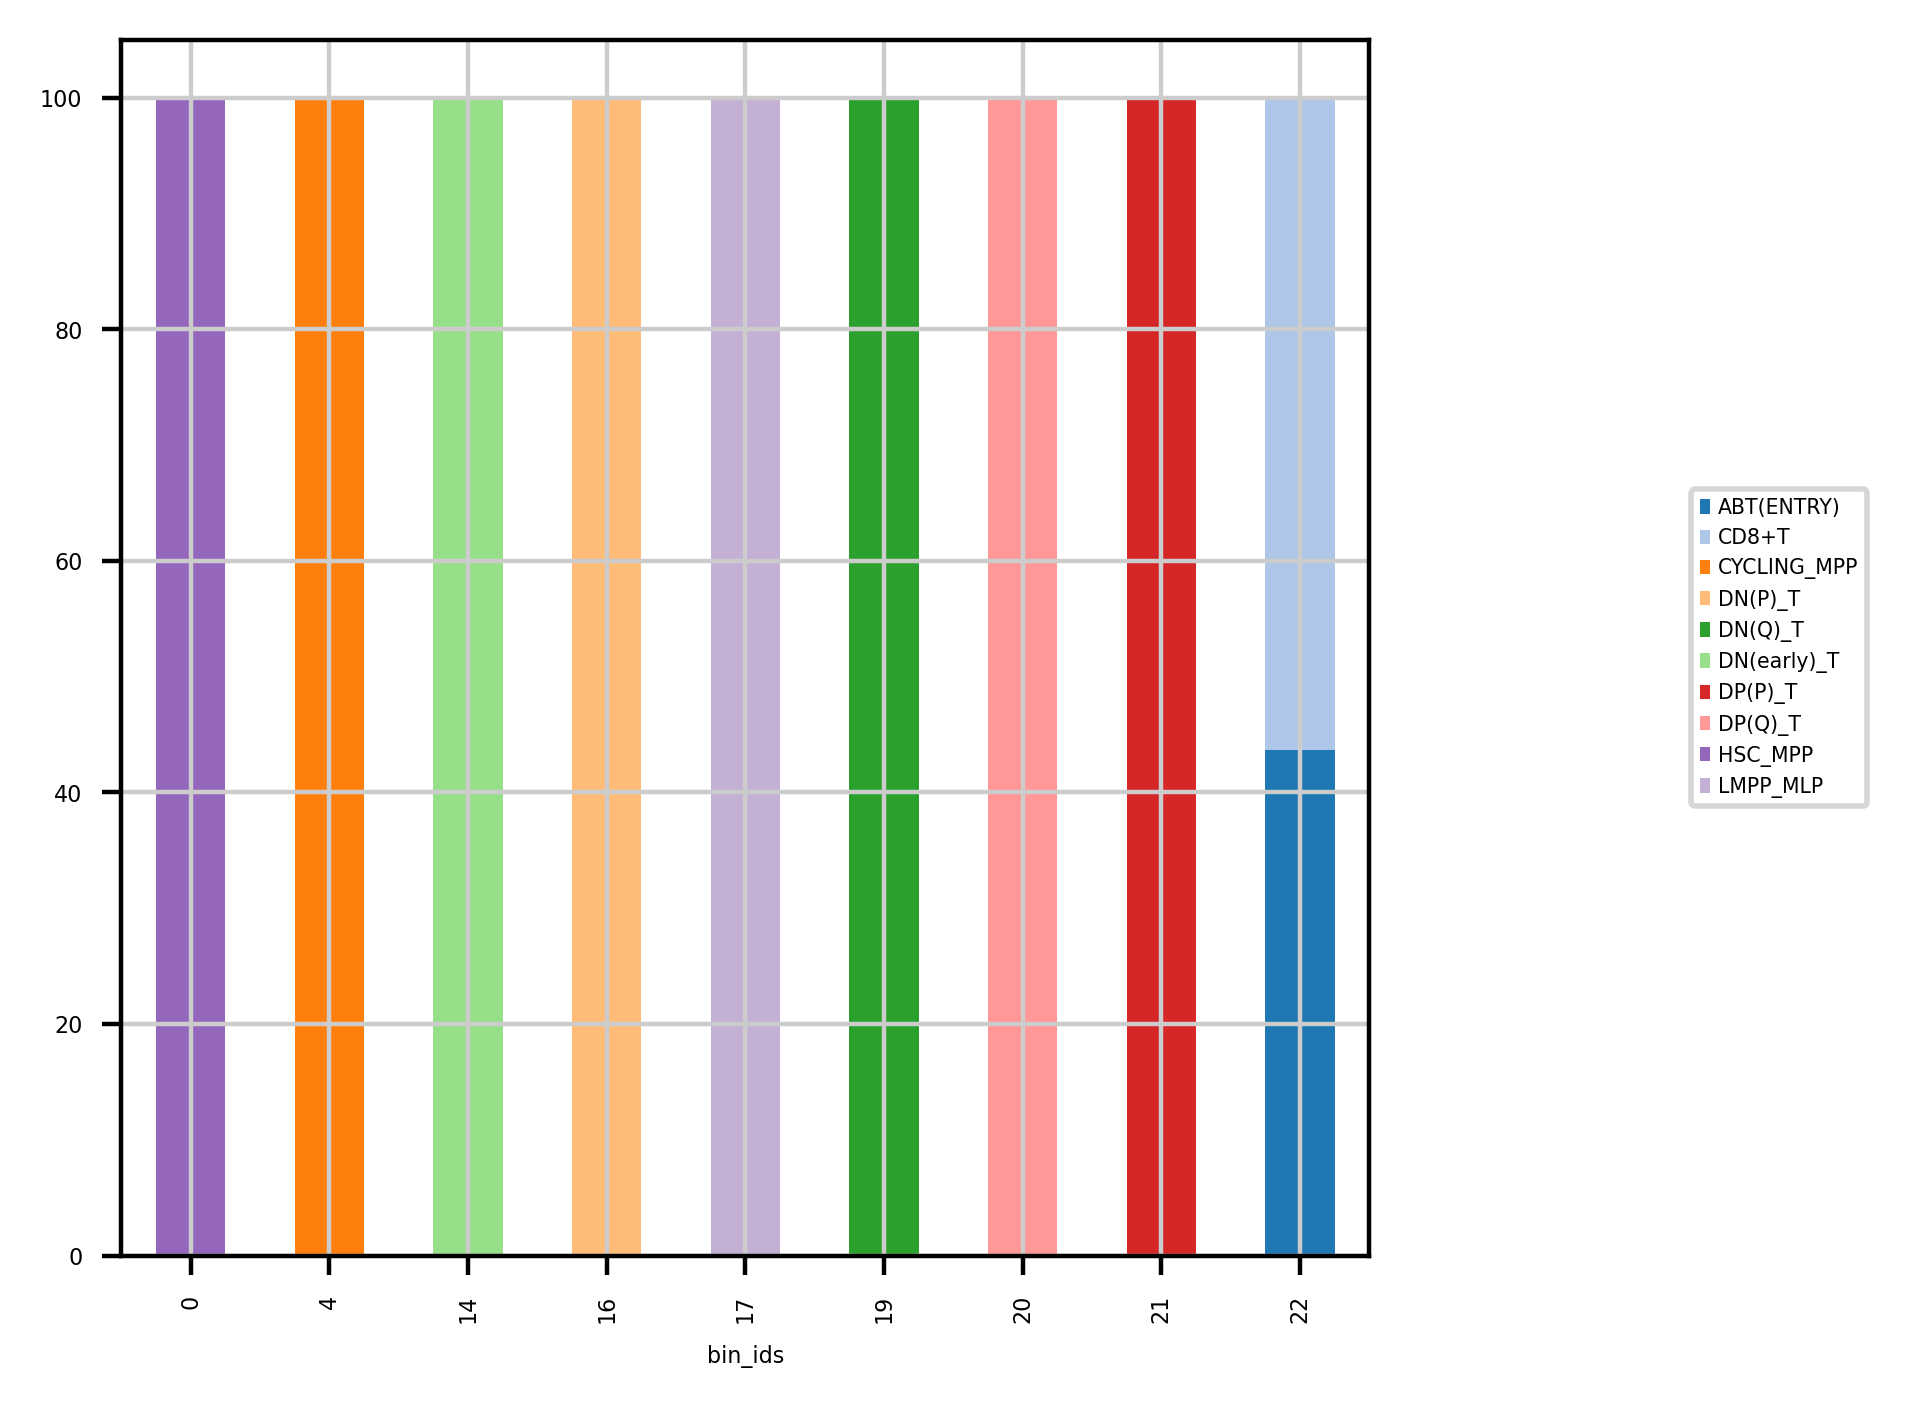

In [22]:
# Cell type composition plotter ---- an independent module ----
import pandas as pd
import matplotlib.pyplot as plt
from functools import cmp_to_key

def plot_celltype_composition_v1(adata_T, TIME_COLNAME):
    
    capture_time = torch.tensor(np.asarray(adata_T.obs[TIME_COLNAME]),dtype=torch.get_default_dtype() )
    capture_time = capture_time + (-1*(np.min(adata_T.obs[TIME_COLNAME]) - 1)) 
    time = capture_time.log2() / 6# we scale the time into the interval [0, 1]
    adata_T.obs['normalised_capture_time'] = time.numpy()

    bins = np.linspace(0,1,25)
    adata_T.obs['bin_ids'] = np.repeat(0,adata_T.shape[0])
    bin_id = 1
    for i in range(len(bins)):
        if(i+1==len(bins)):
            sub_adata=adata_T[list(adata_T.obs.normalised_capture_time >= bins[i]) ]
            adata_T.obs['bin_ids'][sub_adata.obs_names] = i 
            break
        sub_adata=adata_T[np.logical_and(list(adata_T.obs.normalised_capture_time >= bins[i]), list(adata_T.obs.normalised_capture_time < bins[i+1])) ]
        adata_T.obs['bin_ids'][sub_adata.obs_names] = i 
        
    plot_cell_type_proportions(adata_T, cell_type_colname='ANNOTATION_COMB',covariate_colname='bin_ids',sorter=None,color_scheme_name= "tab20")


def time_code_cmp(x,y):
    nx = re.split("[a-z]",x)[0]
    cx = x[len(x)-1]
    ny = re.split("[a-z]",y)[0]
    cy = y[len(y)-1]
    if(cx!=cy):
        if(cx=="w"):
            return -1
        elif(cx=="m" and cy=="y"):
            return -1
        else:
            return 1
    else:
        if(int(nx)< int(ny)):
            return -1
        else:
            return 1 
def sorter_help(col_as_series): # really unnecessary intermediate function to help panda take custom key sorter function (can't help as panda only takes a series)
    sorter = cmp_to_key(time_code_cmp)
    reorder = col_as_series.tolist()
    reorder.sort(key=sorter)
    return pd.Series(pd.Categorical(col_as_series, categories=reorder, ordered=True))

def plot_cell_type_proportions(adata, cell_type_colname, covariate_colname, sorter, color_scheme_name="Spectral"):
    meta1 = pd.DataFrame(np.vstack((adata.obs[cell_type_colname],adata.obs[covariate_colname])).transpose(),columns=[cell_type_colname,covariate_colname])
    meta1['COUNTER'] = 1
    meta1 = meta1.groupby([covariate_colname,cell_type_colname])['COUNTER'].sum().unstack()
    meta1 = meta1.fillna(0)
    meta1 = meta1.sort_values(by=covariate_colname, key=sorter)
    p = meta1.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True, color=sb.color_palette(color_scheme_name, 20))
    p.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
    

plot_celltype_composition_v1(adata[adata.obs.ID=='Reference'], TIME_COLNAME='refined_new_approx_time') #new_approx_time'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


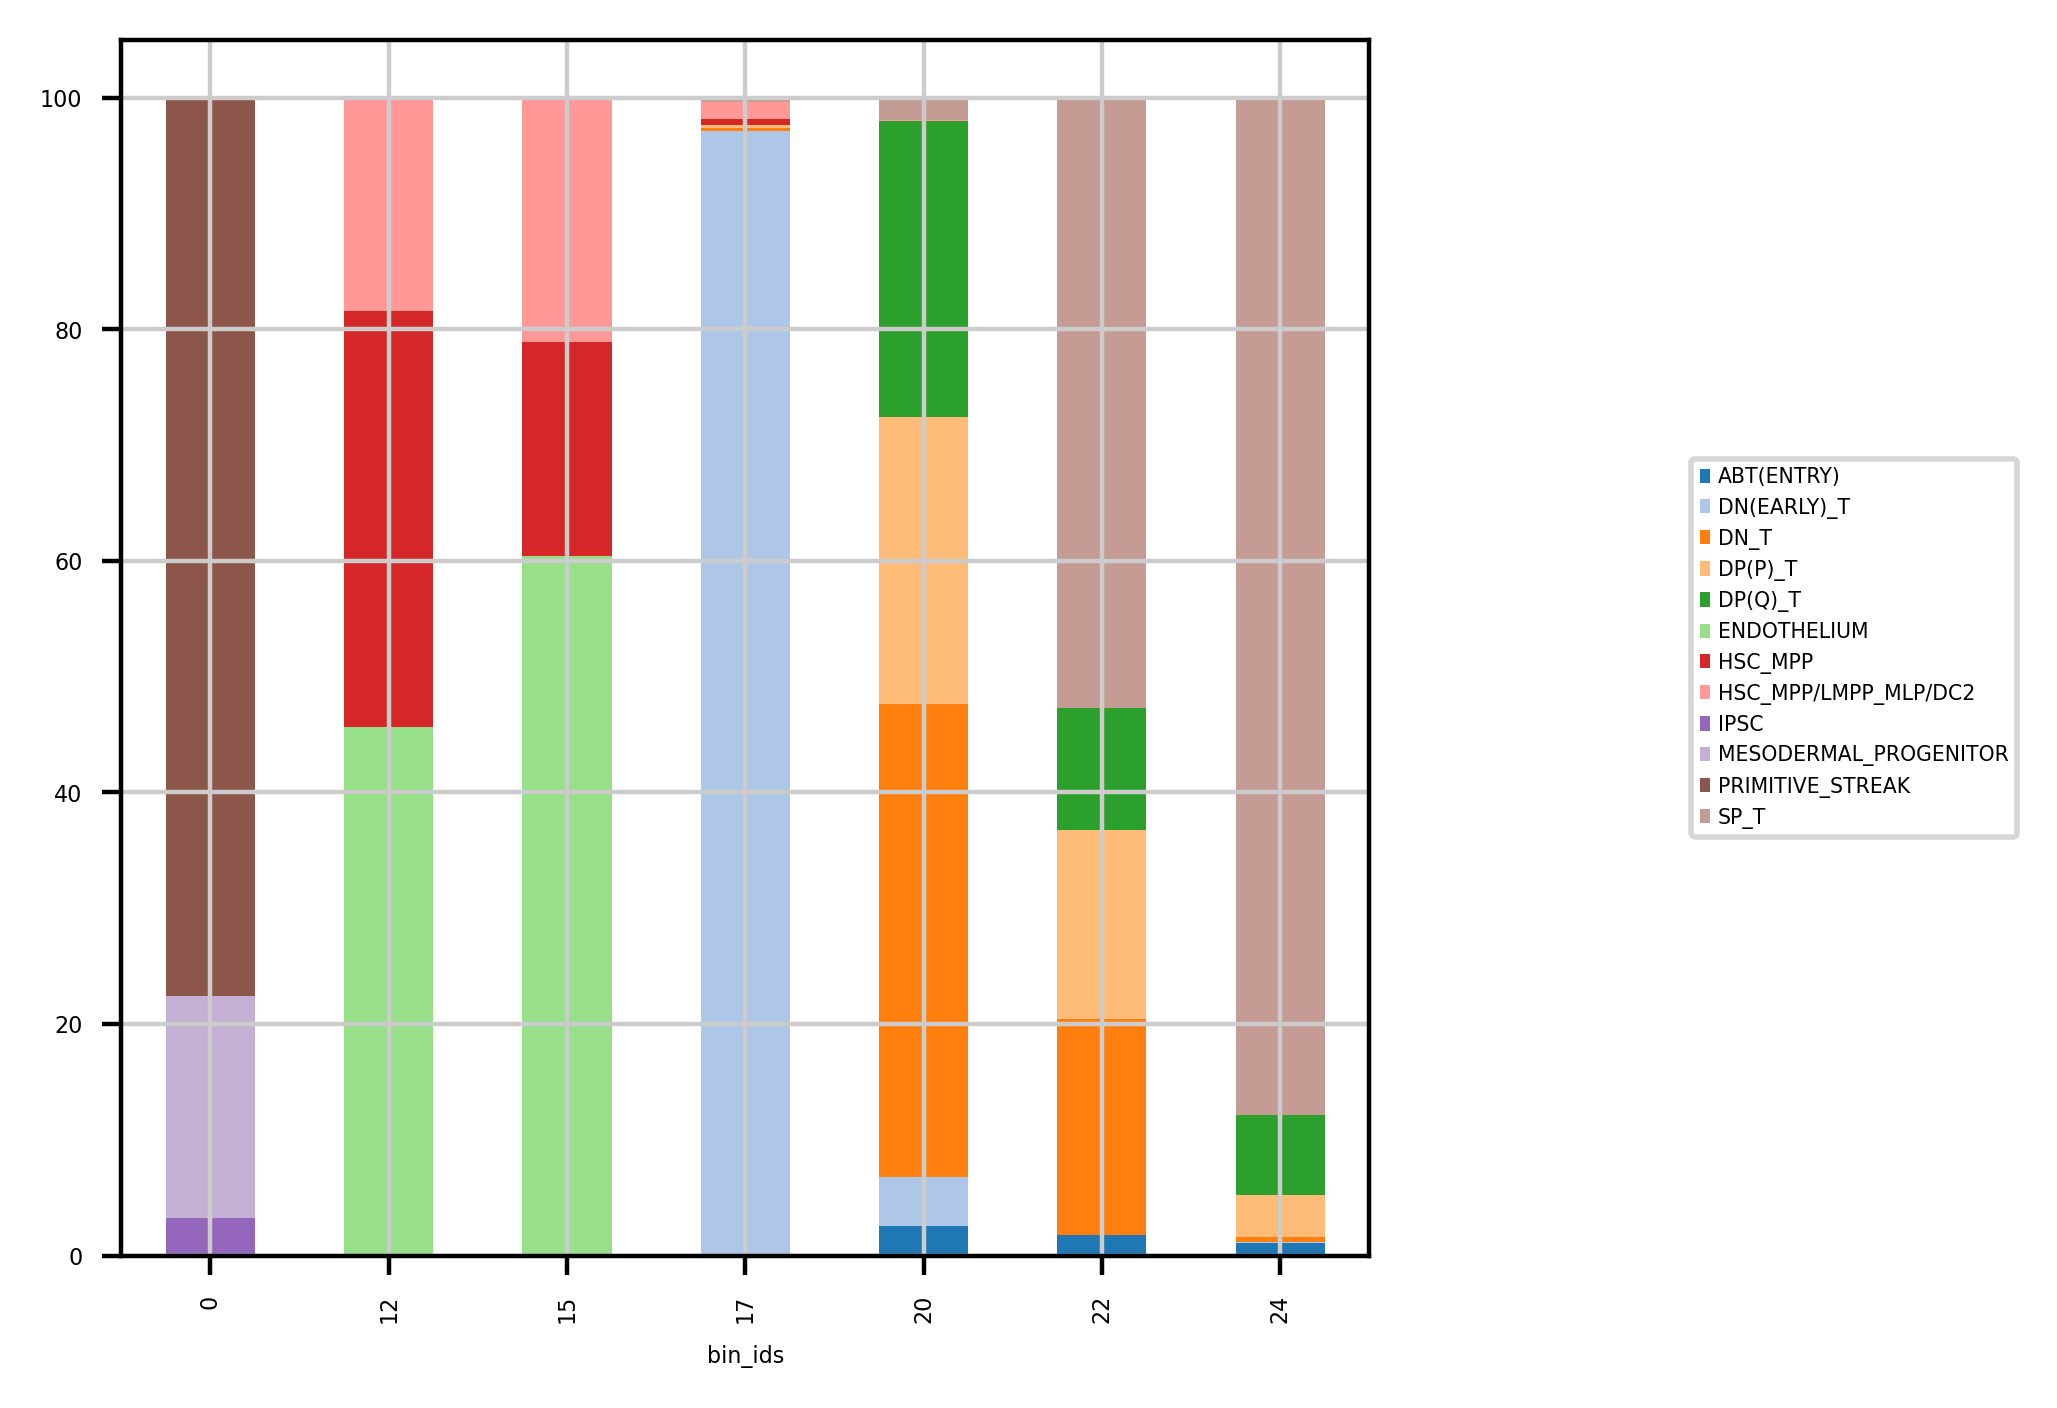

In [23]:
plot_celltype_composition_v1(adata[adata.obs.ID=='Organoid'], TIME_COLNAME='refined_new_approx_time')

In [24]:
adata.write_h5ad('adata_refato_CD8_lineage.h5ad')

In [25]:
#adata_org.write_h5ad('G2G_datasets/adata_org_SPT_29112022.h5ad')
#adata_ref.write_h5ad('G2G_datasets/adata_ref_SPT_29112022.h5ad')
adata_org = adata[adata.obs.ID=='Organoid']
adata_ref = adata[adata.obs.ID=='Reference']

#adata_org.write_h5ad('adata_org_CD8Lineage.h5ad')
adata_ref.write_h5ad('adata_ref_CD8Lineage.h5ad')

### GPLVM RUN

In [3]:
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
import numpy as np 
import torch
import pandas as pd
import seaborn as sb

torch.cuda.is_available() 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from tqdm import tqdm
import pandas as pd
import torch
from torch.nn import Parameter
import pyro
import pyro.contrib.gp as gp
import pyro.distributions as dist
import pyro.ops.stats as stats

In [4]:
adata_ref = anndata.read_h5ad('adata_ref_CD8Lineage.h5ad')
#adata = anndata.read_h5ad('adata_refato_CD8_lineage.h5ad')

In [5]:
adata_T = adata_ref

In [6]:
adata_T

AnnData object with n_obs × n_vars = 20324 × 2616
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'name', 'uniform_label', 'uniform_label_expanded_merged', 'uniform_label_lvl0', 'organ', 'Sample.lanes', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Processing_method', 'AnnatomicalPart', 'Sample', 'bbk', 'scvi_clusters', 'anno_lvl_2_LYMPHOID', 'anno_lvl_2_MYELOID', 'anno_lvl_2_MEM_PROGENITORS', 'leiden_150', 'ANNOTATION', 'batch', 'ATO_days', 'ID', 'sanger_sample_id', 'time_id', 'new_annotation', 'percent_total_mito_UMI', '_scvi_batch', '_scvi_labels', 'ANNOTATION_COMB', 'new_approx_time', 'refined_new_approx_time'
    var: 'GeneID-0', 'GeneName-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'mt-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ANNOTATION_COMB_colors', 'ANNOTATION_colors', 'ID_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'log1p', 'neighbors', 'new_annotation_co

In [5]:
def run_gplvm(adata, time_prior_var_name,n_latent_dim=2, num_steps = 1000):

    pyro.set_rng_seed(1)

    data = torch.tensor(adata.X.todense(), dtype=torch.get_default_dtype())
    #data = torch.tensor(adata_sars.X.todense(), dtype=torch.get_default_dtype())

    y = data.t()
    capture_time = torch.tensor(np.asarray(adata_T.obs['new_approx_time']),dtype=torch.get_default_dtype() )
    capture_time = capture_time + (-1*(np.min(adata_T.obs['new_approx_time']) - 1)) 
    #time = capture_time
    time = capture_time.log2() / 6# we scale the time into the interval [0, 1]
    #time = capture_time/np.sum(np.unique(capture_time)) 
    adata_T.obs['normalised_capture_time'] = time.numpy()

    # X Latent dimensions initialisation 
    X_prior_mean = torch.zeros(y.size(1), n_latent_dim)  # shape: cells x 2
    X_prior_mean[:, 0] = time

    kernel = gp.kernels.RBF(input_dim=n_latent_dim, lengthscale=torch.ones(n_latent_dim))

    # we clone here so that we don't change our prior during the course of training
    X = Parameter(X_prior_mean.clone())

    # SparseGPRegression model with num_inducing=32;
    # initial values for Xu are sampled randomly from X_prior_mean
    Xu = stats.resample(X_prior_mean.clone(), 32)
    noise_tensor = torch.tensor(0.01)
    gplvm = gp.models.SparseGPRegression(X, y, kernel, Xu, noise=noise_tensor, jitter=1e-4)
    gplvm.X = pyro.nn.PyroSample(dist.Normal(X_prior_mean, 0.1).to_event())
    gplvm.autoguide("X", dist.Normal)

    losses = gp.util.train(gplvm, num_steps=num_steps)

    # loss curve
    plt.plot(losses)
    plt.show()
    gplvm.mode = "guide"
    X = gplvm.X  # draw a sample from the guide of the variable X
    
    return X, gplvm, y

def plot_gplvm_embedding(adata, time_prior_var_name):
    adata.obs[time_prior_var_name] = np.asarray(adata.obs[time_prior_var_name], dtype=str)
    sc.set_figure_params(figsize=(6,6))
    sc.pl.embedding(adata, 'X_gplvm', color=[time_prior_var_name], size=90)
    

def estimate_pseudotime(adata):
    X, gplvm, y = run_gplvm(adata, time_prior_var_name='new_approx_time', n_latent_dim=1)
    X = torch.zeros(adata.shape[0], 2)  # shape: cells x 2
    X[:, 0] = gplvm.X.flatten()   
    adata.obsm['X_gplvm'] = X.detach().numpy() 
    plot_gplvm_embedding(adata,'new_approx_time')
    adata.obs['time'] = np.asarray(pd.DataFrame(adata.obsm['X_gplvm'])[0] ) 
    return adata

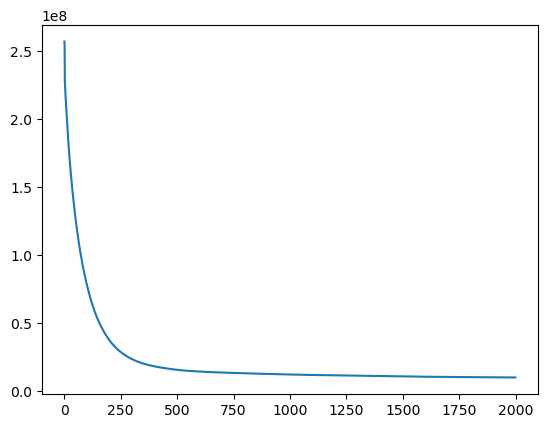

In [6]:
X, gplvm, y = run_gplvm(adata_T, time_prior_var_name='refined_new_approx_time', n_latent_dim=2, num_steps=2000)

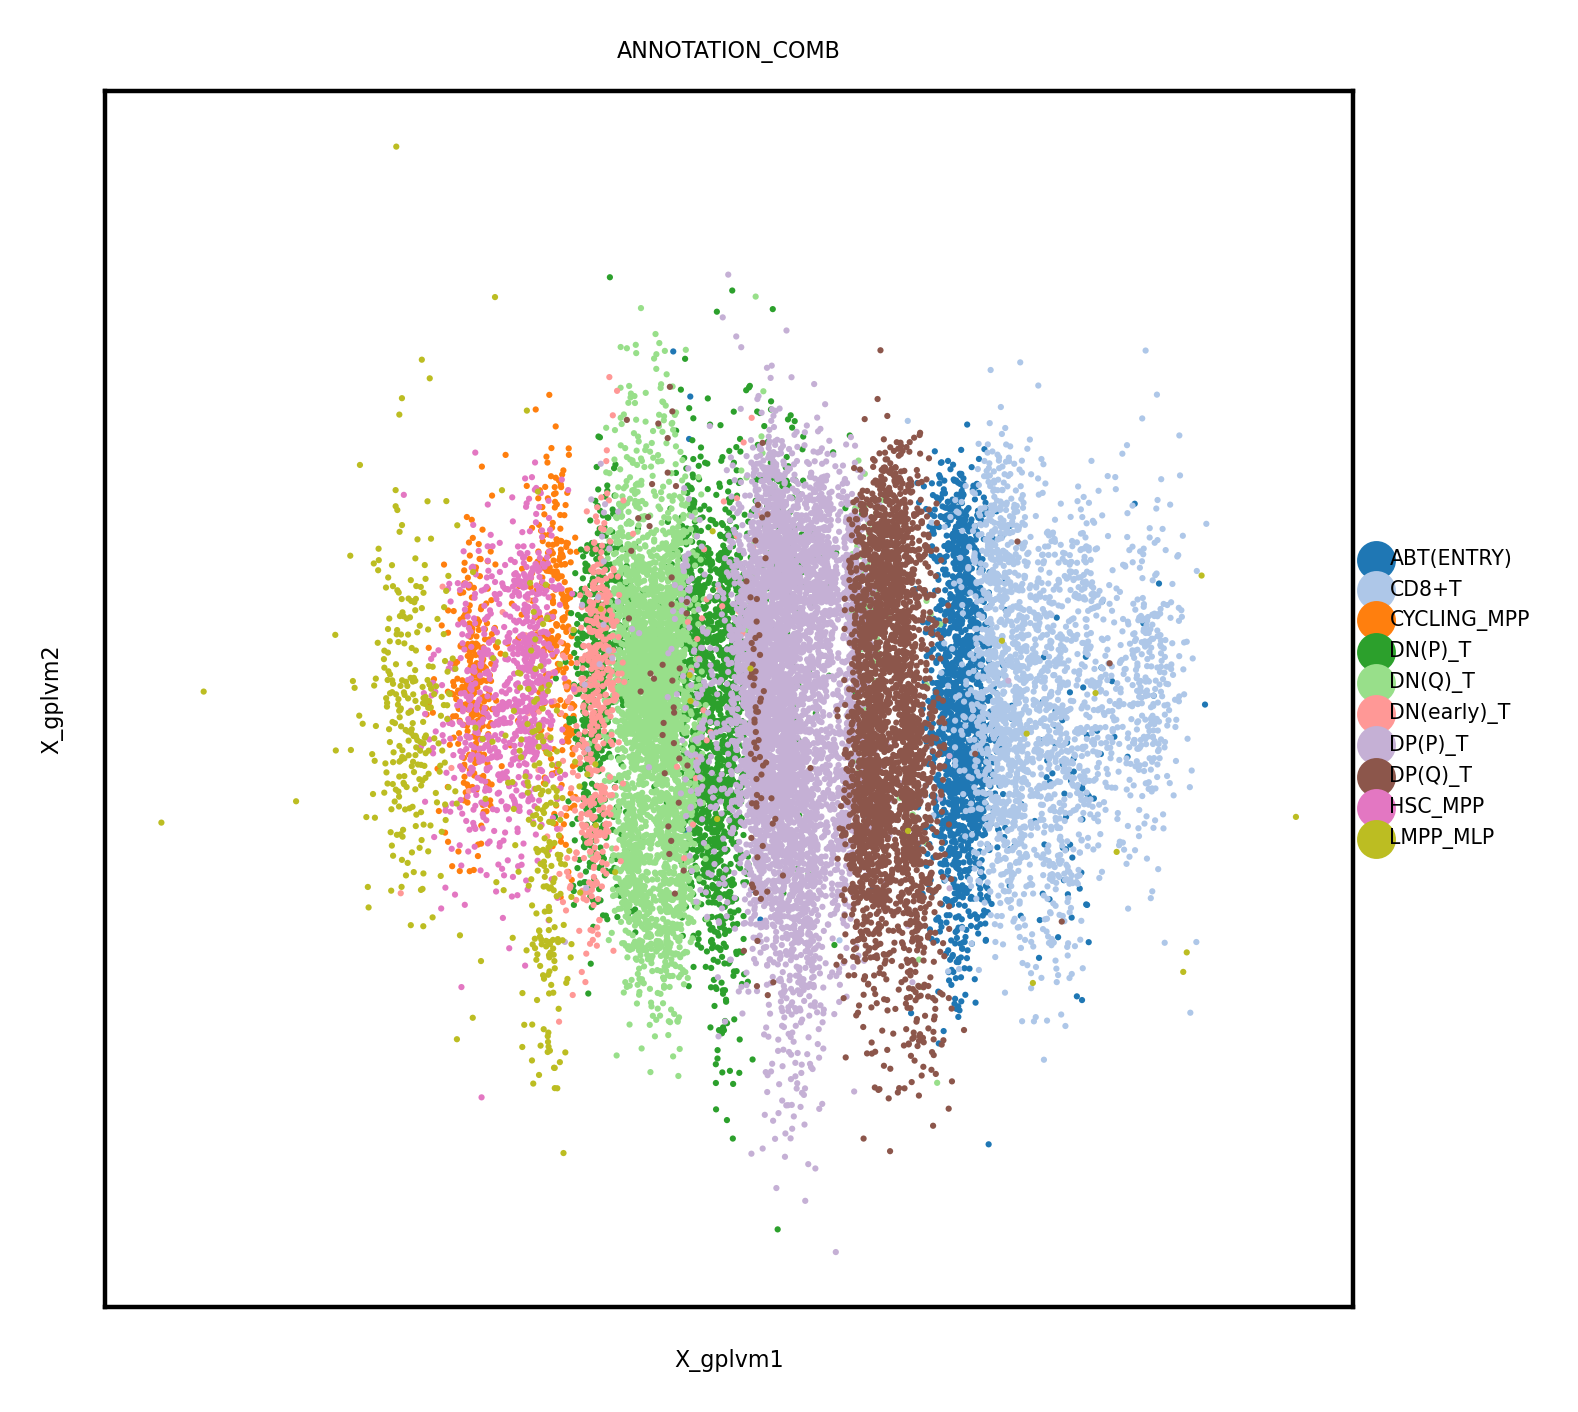

In [7]:
sc.set_figure_params(fontsize=4, dpi=200)
adata_T.obsm['X_gplvm'] = X.detach().numpy() 
sc.pl.embedding(adata_T, 'X_gplvm', color=['ANNOTATION_COMB'], size=5)

In [8]:
adata_T.obs['gplvm_pseudotime'] = X.detach().numpy()[:,0]

In [9]:
pd.DataFrame([adata_T.obs['gplvm_pseudotime'], adata_T.obs['ANNOTATION_COMB']] ).transpose().groupby('ANNOTATION_COMB').mean()

gplvm_pseudotime
ANNOTATION_COMB                  
ABT(ENTRY)               1.623757
CD8+T                    1.955859
CYCLING_MPP             -0.263611
DN(P)_T                  0.471976
DN(Q)_T                  0.352341
DN(early)_T              0.098763
DP(P)_T                  0.882917
DP(Q)_T                  1.286934
HSC_MPP                 -0.280075
LMPP_MLP                -0.386265

In [10]:
adata_T.write_h5ad('adata_ref_CD8Lineage_gplvm.h5ad')

In [15]:
adata_T.X.data

array([1.5837029, 1.5837029, 1.5837029, ..., 1.388398 , 2.5675378,
       1.388398 ], dtype=float32)

### Saving all genes objects for downstream analysis

In [1]:
import scanpy as sc
import scvi 
import anndata
import matplotlib.pyplot as plt
import numpy as np 
import torch
import pandas as pd
import seaborn as sb
import scanpy.external as sce
from tqdm import tqdm

torch.cuda.is_available() 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#scvi.settings.seed = <>

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
scvi.__version__


adata_ref = anndata.read_h5ad('adata_ref_panfetal_CD8Lineage_reduced_b4_preprocessing.h5ad')
adata_ref.X = adata_ref.layers['counts']
adata_ref.obs['ATO_days'] = np.repeat(10000,adata_ref.shape[0])
adata_ref.obs['ID'] = np.repeat('Reference', adata_ref.shape[0])

adata_ato = anndata.read_h5ad('adata_ATO_SPT.h5ad')
adata_ato.obs['ID'] = np.repeat('Organoid',adata_ato.shape[0])

Global seed set to 0


In [3]:
adata_ref

AnnData object with n_obs × n_vars = 20412 × 33538
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'name', 'uniform_label', 'uniform_label_expanded_merged', 'uniform_label_lvl0', 'organ', 'Sample.lanes', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Processing_method', 'AnnatomicalPart', 'Sample', 'bbk', 'scvi_clusters', 'anno_lvl_2_LYMPHOID', 'anno_lvl_2_MYELOID', 'anno_lvl_2_MEM_PROGENITORS', 'leiden_150', 'ANNOTATION', 'batch', 'ATO_days', 'ID'
    var: 'GeneID', 'GeneName', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ANNOTATION_colors'
    obsm: 'X_scvi', 'X_umap'
    layers: 'counts'

In [2]:
adata_ato

AnnData object with n_obs × n_vars = 19013 × 33538
    obs: 'sanger_sample_id', 'batch', 'time_id', 'new_annotation', 'bbk', 'ATO_days', 'ID'
    var: 'mt'
    layers: 'counts'

In [5]:
adata_ref.write_h5ad('adata_ref_CD8Lineage_all_genes_b4_preprocessing.h5ad')
adata_ato.write_h5ad('adata_ato_SPTLineage_all_genes_b4_preprocessing.h5ad')

In [8]:

adata_ref = anndata.read_h5ad('adata_ref_panfetal_SPTLineage_reduced_b4_preprocessing.h5ad')
adata_ref.X = adata_ref.layers['counts']
adata_ref.obs['ATO_days'] = np.repeat(10000,adata_ref.shape[0])
adata_ref.obs['ID'] = np.repeat('Reference', adata_ref.shape[0])
adata_ref.write_h5ad('adata_ref_SPTLineage_all_genes_b4_preprocessing.h5ad')

In [9]:
adata_ref

AnnData object with n_obs × n_vars = 20384 × 33538
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'name', 'uniform_label', 'uniform_label_expanded_merged', 'uniform_label_lvl0', 'organ', 'Sample.lanes', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Processing_method', 'AnnatomicalPart', 'Sample', 'bbk', 'scvi_clusters', 'anno_lvl_2_LYMPHOID', 'anno_lvl_2_MYELOID', 'anno_lvl_2_MEM_PROGENITORS', 'leiden_150', 'ANNOTATION', 'batch', 'ATO_days', 'ID'
    var: 'GeneID', 'GeneName', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ANNOTATION_colors'
    obsm: 'X_scvi', 'X_umap'
    layers: 'counts'